## 線形モデル

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline

w[0]: 0.393906  b: -0.031804


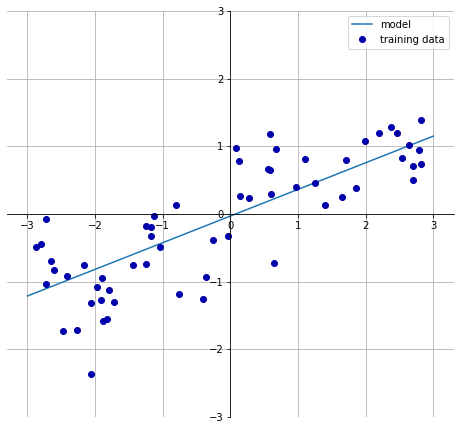

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


### 用語確認

* 通常最小二乗法(ordinary least squares:OLS)：最も単純で有名な線形回帰手法。
* 平均二乗誤差(mean squared error)：予測と真の値との二乗したものを平均したもの
* 傾きを表すパラメータがはwで、重みまたは係数と呼ばれる(coefficient)
* オフセットもしくは切片(intercept)

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


* 過剰適合ではないが適合不足である（決定係数R^2が0.6というのは少し微妙）

In [6]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


* 訓練データに対しては非常に正確だがテストデータに対してはまだ正確ではない（つまり過剰適合が生じている）

## Ridge回帰

In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


* 少しテストデータの精度がよくなりました。Ridge回帰は制約の強いモデルなので過剰適合が少ない
* またデフォルトでRidge回帰の制約度の強さが１に設定されている。
* このパラメータを大きくすると訓練データに対する性能は低下するが汎化性能は向上する

In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [10]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


* alphaを小さくすると係数の制約は小さくなる

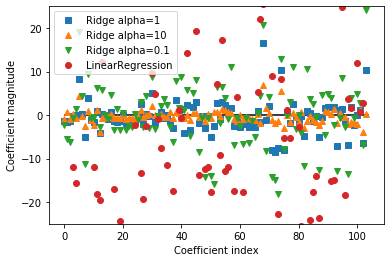

In [11]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

* 様々なαによるリッジ回帰と、線形回帰に対する係数の大きさの比較

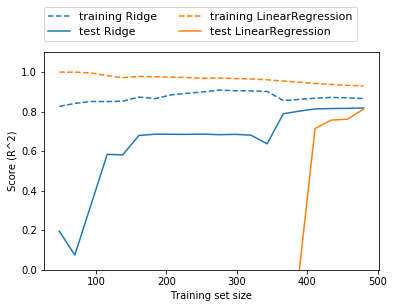

In [12]:
mglearn.plots.plot_ridge_n_samples()

* どちらの場合も訓練データはテストデータよりも大きい
* 線形回帰のテストデータはサンプルサイズが小さいとほぼ意味を成さないが、大きくなるとリッジ回帰に追いつく
* 十分な訓練データがある場合は正則化は特に意味を成さなくなってしまう

## Lasso回帰

* リッジと同様に係数が０になるように制約をかけるがこちらはかけ方が少し違い、L１正則化と呼ばれる。
* 正則化を行うことでいくつかの係数が０になる。

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score:0.29
Test set score:0.209375
Number of features used: 4


* 訓練データにしてもテストデータに対しても適合不足が生じている
* 適合不足を解消するためにαの値を小さくして、max_iter(最大の繰り返し回数)をふやす

In [14]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score:0.90
Test set score:0.765657
Number of features used: 33


In [15]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score:{:2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score:0.95
Test set score:0.643747
Number of features used: 96


* alphaを小さくすることでより複雑なモデルに適合するようになり、訓練データに対してもテストデータに対しても良い結果が得られる。
* alphaを小さくしすぎるとリッジの場合と同様正則化の効果が薄れて、過剰適合が発生する

Text(0, 0.5, 'Coefficient magnitude')

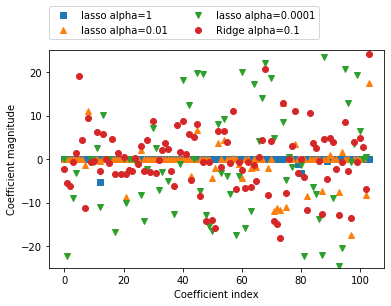

In [16]:
plt.plot(lasso.coef_, 's', label="lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

* alphaが一の場合はほとんどの係数が０（よって使用される特徴量が非常に少なくなってしまう）
* 0.01ほどになると多くの係数がゼロではなくなる
* ridgeの場合は0.1でもゼロになるのが少ない（先に使用するのはRidge回帰を優先的に使用する）
* 逆に特徴量が多く必要な特徴量が少ないと思われる時にはlasso回帰を使用する

### クラス分類のための線形モデル

* クラス分類では決定境界が入力の線形関数になる


##### 線形モデルを学習するには様々なアルゴリズムがある

* 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
* 正則化を行うか。行うならどの方使用するか

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


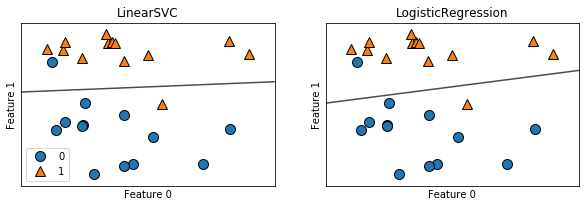

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

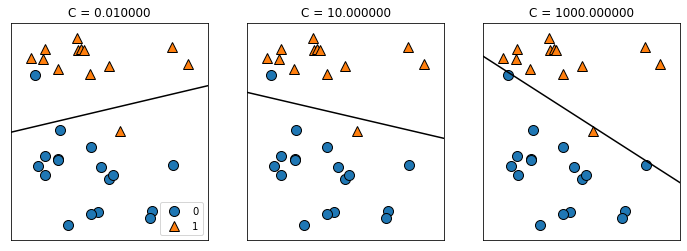

In [18]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))x

Training set score:0.953
Test set score:0.958


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.972
Test set score:0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* デフォルトパラメータよりも精度が低くなっている

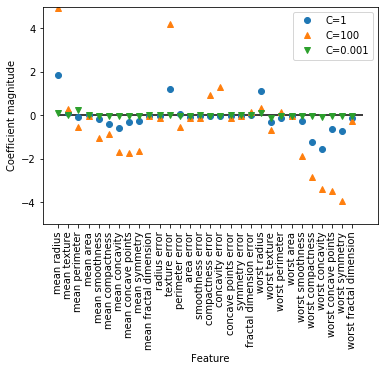

In [28]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

* LogisitcRegressionではデフォルトでL2正則化（Ridge回帰）が行われる

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of  l1 logreg with C=0.001: 0.91
Test accuracy of  l1 logreg with C=0.001: 0.92
Training accuracy of  l1 logreg with C=1.000: 0.96
Test accuracy of  l1 logreg with C=1.000: 0.96
Training accuracy of  l1 logreg with C=100.000: 0.99
Test accuracy of  l1 logreg with C=100.000: 0.98


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


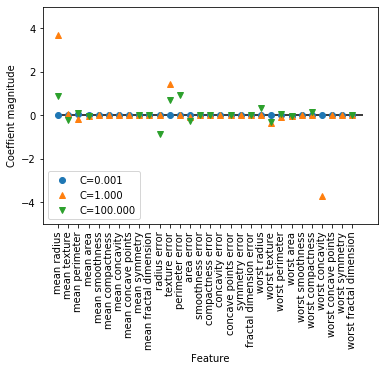

In [32]:
for C, marker in   zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of  l1 logreg with C={:.3f}: {:.2f}".format(C,
                                                                        lr_l1.score(X_train, y_train)))
    print("Test accuracy of  l1 logreg with C={:.3f}: {:.2f}".format(C,
                                                                        lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coeffient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

* 多くの線形クラス分類モデルは、二クラス分離にしか適していない。
* 二クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として**一対その他(one-vs,-rest)**アプローチがある

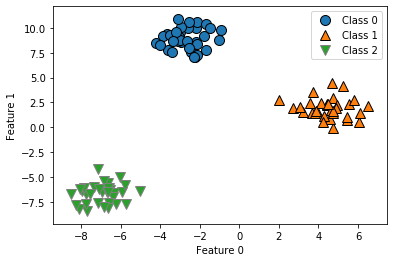

In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [34]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


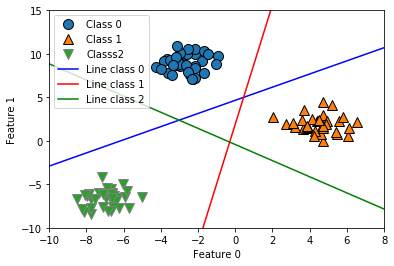

In [36]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Classs2', 'Line class 0', 'Line class 1', 'Line class 2'])

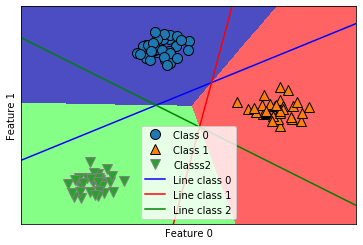

In [37]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Classs2', 'Line class 0', 'Line class 1', 'Line class 2'])

* 線形モデルの主要なパラメータは、回帰モデルではalpha, linearSVCと、LogisticRegressionではCと呼ばれる正則化パラメータ
* alphaが大きい場合、Cが小さい場合はたんんじゅんなモデルに対応する
* 回帰モデルの場合、パラメータ調整は非常に重要
* L1,L2どちらを使用するか決める
* 一部の特徴量だけが重要の場合、L1を使う。そうでなければL2を使用する（デフォルトはL２）
* サンプル点が10万、100万ある場合は**LogisticRegressionやRidgeにsolover='sag'オプション**を使うべき。（デフォルトより高速になる）
* **SGDClassifirクラスとSGDRegressorクラス**（さらに大規模なデータに適した線形モデルを実装している）

#### 線形モデルの利点
* 訓練モデルは非常に高速で、予測も高速
* 予測手法が理解しやすい
* 特徴量の数がサンプル数よりも多い時に性能をはっきする
* 低次元空間の場合は他のモデルを検討した方がいいかもしれない